# Plotting

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [2]:
#load data
model_df = pd.read_csv("models_depmap2024.tsv", sep="\t", index_col=0)
rnaseq_df = pd.read_csv("rnaseq_depmap2024.tsv", sep="\t", index_col=0)

In [ ]:
model_df
#model_df.head()

,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,RRID,Age,AgeCategory,Sex,PatientRace,PrimaryOrMetastasis,SampleCollectionSite,SourceType,SourceDetail,CatalogNumber,ModelType,TissueOrigin,ModelDerivationMaterial,ModelTreatment,PatientTreatmentStatus,PatientTreatmentType,PatientTreatmentDetails,Stage,StagingSystem,PatientTumorGrade,PatientTreatmentResponse,GrowthPattern,OnboardedMedia,FormulationID,SerumFreeMedia,PlateCoating,EngineeredModel,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
ModelID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,CVCL_0465,60.0,Adult,Female,caucasian,Metastatic,ascites,ATCC,ATCC,HTB-71,Cell Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adherent,MF-001-041,RPMI + 20% FBS + 0.01 mg/ml insulin,False,NaN,NaN,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",CVCL_0002,36.0,Adult,Female,caucasian,Primary,haematopoietic_and_lymphoid_tissue,ATCC,ATCC,CCL-240,Cell Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suspension,MF-005-001,IMDM + 10% FBS,False,NaN,NaN,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,CVCL_0025,72.0,Adult,Male,caucasian,Primary,Colon,ATCC,ATCC,HTB-37,Cell Line,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,Adherent,MF-015-009,EMEM + 20% FBS,False,NaN,NaN,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",CVCL_0001,30.0,Adult,Male,caucasian,Primary,haematopoietic_and_lymphoid_tissue,DSMZ,DSMZ,ACC 11,Cell Line,NaN,NaN,NaN,Post-treatment,NaN,NaN,NaN,NaN,NaN,NaN,Suspension,MF-001-001,RPMI + 10% FBS,False,NaN,NaN,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,CVCL_2481,30.0,Adult,Male,caucasian,NaN,bone_marrow,ATCC,ATCC,HEL9217,Cell Line,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mixed,MF-001-001,RPMI + 10% FBS,False,NaN,NaN,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ACH-003473,PT-fG5tCh,CCLF_PEDS_0013_T,CCLFPEDS0013T,ERMS,Soft Tissue,Rhabdomyosarcoma,Embryonal Rhabdomyosarcoma,ERMS,NaN,NaN,1.0,Pediatric,Female,caucasian,Primary,soft_tissue,CCLF,NaN,NaN,Cell Line,NaN,NaN,NaN,Pre-treatment,NaN,NaN,NaN,NaN,NaN,NaN,Adherent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCM-BROD-0006-C49,NaN,NaN,NaN,NaN,NaN
ACH-003474,PT-WxfjG3,CCLF_HNSC_0001_T,CCLFHNSC0001T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,NaN,77.0,Adult,Male,caucasian,Primary,NaN,CCLF,NaN,NaN,Cell Line,NaN,NaN,NaN,Pre-treatment,NaN,NaN,NaN,NaN,NaN,NaN,Adherent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HCM-BROD-1131-C06,NaN,NaN,NaN,NaN,NaN
ACH-003475,PT-ce6oqw,CCLF_HNSC_0003_T,CCLFHNSC0003T,HNSC,Head and Neck,Head and Neck Squamous Cell Carcinoma,Head and Neck Squamous Cell Carcinoma,HNSC,NaN,NaN,76.0,Adult,Female,caucasian,Metastatic,lymph_node,CCLF,NaN,NaN,Cell Line,NaN,NaN,NaN,Pre-treatment,NaN,NaN,NaN,NaN,NaN,NaN,Adherent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
rnaseq_df

,TFE3 (7030),MMADHC (27249),PABPC1L (80336),RELL2 (285613),GPT (2875),GUSB (2990),H4-16 (121504),DDB2 (1643),RPS4X (6191),HINFP (25988),ZFP1 (162239),LDAH (60526),NDUFA7 (4701),PTPN11 (5781),ROGDI (79641),DTNBP1 (84062),GNG10 (2790),PBX2 (5089),ANK3 (288),FAM234B (57613),LBP (3929),PRDM2 (7799),CDC27 (996),ADTRP (84830),MAN2B2 (23324),PCDHGB3 (56102),METTL2A (339175),COG1 (9382),ADRM1 (11047),EDC3 (80153),CYB5R4 (51167),CLTCL1 (8218),FCAMR (83953),C2CD4A (145741),TRIM71 (131405),NT5M (56953),CASP8 (841),ZBTB2 (57621),SFR1 (119392),CERS2 (29956),...,GLB1L3 (112937),SEMA3E (9723),MEP1A (4224),ZNF485 (220992),SPATA32 (124783),SAR1B (51128),CELSR2 (1952),KIAA1109 (84162),DCUN1D2 (55208),TSC1 (7248),REG1B (5968),CCDC154 (645811),C10orf53 (282966),ZNF517 (340385),SMIM19 (114926),CIAPIN1 (57019),MAD2L2 (10459),LGI1 (9211),CD2 (914),RCAN1 (1827),FLII (2314),GNRH1 (2796),ATP13A2 (23400),OR2AP1 (121129),ZSCAN30 (100101467),ATP2B4 (493),DRD3 (1814),AGTR1 (185),TBC1D26 (353149),CCNG1 (900),OR2A42 (402317),HOXB7 (3217),NSA2 (10412),UGT2B11 (10720),ZNF747 (65988),NAA60 (79903),MYH4 (4622),MTAP (4507),C14orf93 (60686),NR3C2 (4306)
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,1.987275,3.004692,6.374721,4.699110,3.653844,3.487992,5.047221,4.931433,2.153632,2.925812,0.026514,3.826359,4.355481,0.081854,2.843042,0.004872,3.638518,3.734659,6.764384,4.241410,2.791727,1.861969,0.006235,0.044879,1.089789,1.799690,2.242001,2.827253,2.252538,6.198764,...,0.447892,-0.040717,0.019115,2.160657,0.069618,3.917066,3.939080,3.137186,3.238588,3.306879,0.001758,0.635038,-0.001458,2.020600,4.496346,4.260125,6.845627,0.006939,0.001693,3.849078,6.451608,1.501938,5.049599,-0.000089,3.104791,3.624425,0.014650,0.029696,-0.004843,5.145056,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,2.972783,4.137306,5.799562,5.426506,4.775993,2.508923,6.807968,4.761954,4.171991,1.999181,0.010263,2.461208,5.128082,0.095411,3.994789,1.618358,4.711412,4.716650,6.990171,4.869203,3.753480,0.067810,0.006235,0.019145,0.009559,1.168779,5.586883,3.754762,2.938633,7.026041,...,0.036016,2.135143,0.058939,2.111176,0.224027,5.236955,2.717748,3.948982,3.927169,4.030705,0.001758,-0.038288,-0.001458,1.472303,5.122587,5.850142,4.855202,0.006939,0.034450,2.026354,8.000046,1.375126,4.428623,-0.000089,3.393659,4.568030,0.000274,0.029696,0.276742,4.579585,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,1.156867,3.070437,6.169138,5.328184,3.223820,3.950603,3.265780,5.856699,0.016962,2.601379,0.042605,3.454741,3.854233,0.012073,2.796645,0.256985,2.939633,3.637405,6.933125,4.589126,3.602209,1.376571,0.006235,-0.020408,3.647145,1.509906,3.545576,3.349905,3.016151,7.725890,...,-0.037378,-0.040717,0.005579,2.371759,-0.016235,3.296410,-0.045443,2.154727,3.657716,2.434389,0.001758,0.158464,-0.001458,2.143429,4.581409,4.771239,5.128233,0.006939,0.018153,0.323275,5.864191,0.549201,4.272442,-0.000089,3.503771,4.902688,0.000274,0.029696,-0.004843,6.864897,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,2.967039,2.940198,4.994755,5.068038,4.005849,3.485488,5.540332,5.237792,3.846277,2.009724,0.010263,3.470131,4.213106,2.067984,1.755224,-0.032025,3.443646,3.296682,7.529529,3.839612,3.158034,2.617630,-0.007372,0.256602,-0.023193,0.988824,3.556939,3.052752,2.877667,5.798902,...,1.654074,1.682892,-0.008091,1.463762,-0.038751,5.211120,2.674601,3.442346,3.191873,2.974945,0.001758,0.319285,-0.001458,1.245081,3.873638,5.519161,5.355204,0.006939,0.098080,2.940199,9.382551,0.718633,3.176203,-0.000089,3.132329,3.015268,0.000274,0.045069,-

In [ ]:
#rename the columns
rnaseq_df.columns = rnaseq_df.columns.map(lambda x: x.split(" ")[0])
#map kind of like apply()
#split the names by " "(the space), [0] means keep the index = 0 elements

In [7]:
rnaseq_df

,TFE3,MMADHC,PABPC1L,RELL2,GPT,GUSB,H4-16,DDB2,RPS4X,HINFP,ZFP1,LDAH,NDUFA7,PTPN11,ROGDI,DTNBP1,GNG10,PBX2,ANK3,FAM234B,LBP,PRDM2,CDC27,ADTRP,MAN2B2,PCDHGB3,METTL2A,COG1,ADRM1,EDC3,CYB5R4,CLTCL1,FCAMR,C2CD4A,TRIM71,NT5M,CASP8,ZBTB2,SFR1,CERS2,...,GLB1L3,SEMA3E,MEP1A,ZNF485,SPATA32,SAR1B,CELSR2,KIAA1109,DCUN1D2,TSC1,REG1B,CCDC154,C10orf53,ZNF517,SMIM19,CIAPIN1,MAD2L2,LGI1,CD2,RCAN1,FLII,GNRH1,ATP13A2,OR2AP1,ZSCAN30,ATP2B4,DRD3,AGTR1,TBC1D26,CCNG1,OR2A42,HOXB7,NSA2,UGT2B11,ZNF747,NAA60,MYH4,MTAP,C14orf93,NR3C2
ACH-000873,3.607691,3.531071,4.982285,2.326016,0.607679,5.118549,1.282028,4.512297,10.075438,2.954654,1.987275,3.004692,6.374721,4.699110,3.653844,3.487992,5.047221,4.931433,2.153632,2.925812,0.026514,3.826359,4.355481,0.081854,2.843042,0.004872,3.638518,3.734659,6.764384,4.241410,2.791727,1.861969,0.006235,0.044879,1.089789,1.799690,2.242001,2.827253,2.252538,6.198764,...,0.447892,-0.040717,0.019115,2.160657,0.069618,3.917066,3.939080,3.137186,3.238588,3.306879,0.001758,0.635038,-0.001458,2.020600,4.496346,4.260125,6.845627,0.006939,0.001693,3.849078,6.451608,1.501938,5.049599,-0.000089,3.104791,3.624425,0.014650,0.029696,-0.004843,5.145056,0.042564,3.870581,5.178480,-0.007723,2.005498,4.213717,-0.001724,3.904800,2.190931,0.203910
ACH-000860,4.192566,6.865682,4.853288,2.725583,0.197016,5.666426,1.154470,4.306808,10.215240,4.096901,2.972783,4.137306,5.799562,5.426506,4.775993,2.508923,6.807968,4.761954,4.171991,1.999181,0.010263,2.461208,5.128082,0.095411,3.994789,1.618358,4.711412,4.716650,6.990171,4.869203,3.753480,0.067810,0.006235,0.019145,0.009559,1.168779,5.586883,3.754762,2.938633,7.026041,...,0.036016,2.135143,0.058939,2.111176,0.224027,5.236955,2.717748,3.948982,3.927169,4.030705,0.001758,-0.038288,-0.001458,1.472303,5.122587,5.850142,4.855202,0.006939,0.034450,2.026354,8.000046,1.375126,4.428623,-0.000089,3.393659,4.568030,0.000274,0.029696,0.276742,4.579585,0.031621,-0.005897,6.749713,-0.007723,1.393644,4.334535,-0.001724,4.812949,3.366939,0.370726
ACH-000439,3.265517,5.804615,1.777636,4.185835,0.389025,6.593342,0.410244,4.411381,11.644890,4.744030,1.156867,3.070437,6.169138,5.328184,3.223820,3.950603,3.265780,5.856699,0.016962,2.601379,0.042605,3.454741,3.854233,0.012073,2.796645,0.256985,2.939633,3.637405,6.933125,4.589126,3.602209,1.376571,0.006235,-0.020408,3.647145,1.509906,3.545576,3.349905,3.016151,7.725890,...,-0.037378,-0.040717,0.005579,2.371759,-0.016235,3.296410,-0.045443,2.154727,3.657716,2.434389,0.001758,0.158464,-0.001458,2.143429,4.581409,4.771239,5.128233,0.006939,0.018153,0.323275,5.864191,0.549201,4.272442,-0.000089,3.503771,4.902688,0.000274,0.029696,-0.004843,6.864897,-0.013226,-0.033868,6.877322,1.596383,3.143557,4.624226,-0.001724,4.122929,2.197136,0.015412
ACH-000318,3.705500,5.813170,4.536005,2.290409,0.471169,5.160089,2.325673,5.017968,9.163992,2.578735,2.967039,2.940198,4.994755,5.068038,4.005849,3.485488,5.540332,5.237792,3.846277,2.009724,0.010263,3.470131,4.213106,2.067984,1.755224,-0.032025,3.443646,3.296682,7.529529,3.839612,3.158034,2.617630,-0.007372,0.256602,-0.023193,0.988824,3.556939,3.052752,2.877667,5.798902,...,1.654074,1.682892,-0.008091,1.463762,-0.038751,5.211120,2.674601,3.442346,3.191873,2.974945,0.001758,0.319285,-0.001458,1.245081,3.873638,5.519161,5.355204,0.006939,0.098080,2.940199,9.382551,0.718633,3.176203,-0.000089,3.132329,3.015268,0.000274,0.045069,-0.004843,5.498533,-0.013226,3.051092,5.610027,-0.007723,2.334419,3.881219,-0.001724,0.394778,3.217293,0.277760
ACH-001142,6.105227,7.051513,4.457555,2.543055,0.022363,4.589966,2.369987,4.105131,10.179188,3.795200,2.701155,3.730290,6.379472,5.726897,4.127478,3.649038,5.797137,5.512046,4.119169,1.919466,0.010263,3.646451,5.713098,1.630245,4.983240,0.548944,3.799129,4.973402,6.833433,5.017891,3.177335,3.599948,-0.007372,-0.020408,-0.023193,0.348613,3.366953,3.899369,3.220134,6.968780,...,-0.024845,1.291921,0.005579,2.752960,0.069618,5.591554,1.059476,4.253718,2.919605,4.311277,0.001758,0.147700,-0.001458,1.710409,4.

In [ ]:
variable_genes = rnaseq_df.var().sort_values(ascending=False)[:1000].index
# top 1000 var genes, we need to make list shorter
# .index means only keep the index (gene names)
variable_genes

Index(['SPARC', 'KRT19', 'FN1', 'C19orf33', 'TGFBI', 'RPS4Y1', 'UCHL1', 'VIM',
       'KRT7', 'KRT8',
       ...
       'NCF4', 'NXN', 'STAP2', 'PROS1', 'APOBEC3G', 'ACP5', 'GAS7', 'KLF4',
       'CDKN1A', 'P4HA2'],
      dtype='object', length=1000)

In [17]:
rnaseq_df = rnaseq_df.loc[:, variable_genes]

In [20]:
# join the ranseq data with the models infomation
joint_df = rnaseq_df.join(model_df[["OncotreeLineage"]],how='left')
# like annotation of these patients

In [ ]:
# for faster run the code, we cut to 1000 genes

In [ ]:
#do PCA analysis!! lower the d

pca = sm.PCA(joint_df[variable_genes], ncomp=2)

In [23]:
pca_df = pca.factors

In [ ]:
pca_df = pca_df.join(model_df[["OncotreeLineage"]], how="left")
# [[OncotreeLineage]] means a dataframe file
# [OncotreeLineage] means a pandas series
#

In [25]:
pca_df

,comp_0,comp_1,OncotreeLineage
ACH-000873,0.009651,-0.009481,Esophagus/Stomach
ACH-000860,0.010914,-0.022688,Lung
ACH-000439,-0.048171,0.009323,Myeloid
ACH-000318,0.012218,-0.025505,Esophagus/Stomach
ACH-001142,0.028165,0.035736,CNS/Brain
...,...,...,...
ACH-001843,0.006864,0.016476,Biliary Tract
ACH-002074,-0.011238,-0.005864,Lung
ACH-001164,-0.000960,0.021436,Soft Tissue
ACH-003180,0.022679,0.035854,Soft Tissue


In [ ]:
pca_df["OncotreeLineage"].nunique()
# check the lineages 

33

In [ ]:
color_map = { lineage: i for i, lineage in enumerate(pca_df["OncotreeLineage"].unique())}
# enumerate not only get names also get the index

In [30]:
color_map

{'Esophagus/Stomach': 0,
 'Lung': 1,
 'Myeloid': 2,
 'CNS/Brain': 3,
 'Fibroblast': 4,
 'Uterus': 5,
 'Peripheral Nervous System': 6,
 'Bone': 7,
 'Kidney': 8,
 'Lymphoid': 9,
 'Bladder/Urinary Tract': 10,
 'Liver': 11,
 'Ovary/Fallopian Tube': 12,
 'Bowel': 13,
 'Skin': 14,
 'Pancreas': 15,
 'Breast': 16,
 'Ampulla of Vater': 17,
 'Head and Neck': 18,
 'Prostate': 19,
 'Thyroid': 20,
 'Pleura': 21,
 'Biliary Tract': 22,
 'Soft Tissue': 23,
 'Cervix': 24,
 'Embryonal': 25,
 'Eye': 26,
 nan: 27,
 'Vulva/Vagina': 28,
 'Other': 29,
 'Muscle': 30,
 'Testis': 31,
 'Adrenal Gland': 32,
 'Hair': 33}

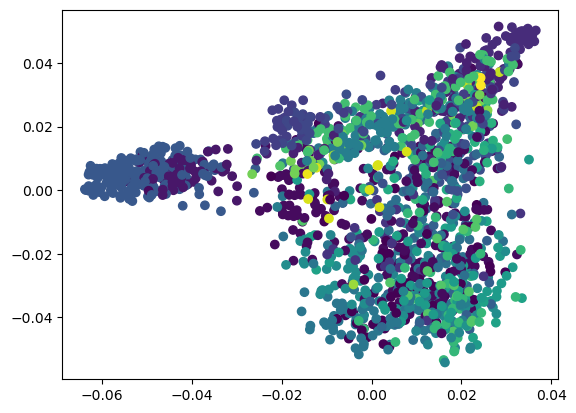

In [37]:
# plot the pca using scatter
# use color
plt.scatter(pca_df["comp_0"],pca_df["comp_1"], 
            c=pca_df["OncotreeLineage"].map(color_map))

In [38]:
# let's highlight the brain
brain_pca_df = pca_df.loc[pca_df["OncotreeLineage"]=="CNS/Brain",:]
nonbrain_pca_df = pca_df.loc[pca_df["OncotreeLineage"]!="CNS/Brain",:]

In [ ]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Arial"
# change the format

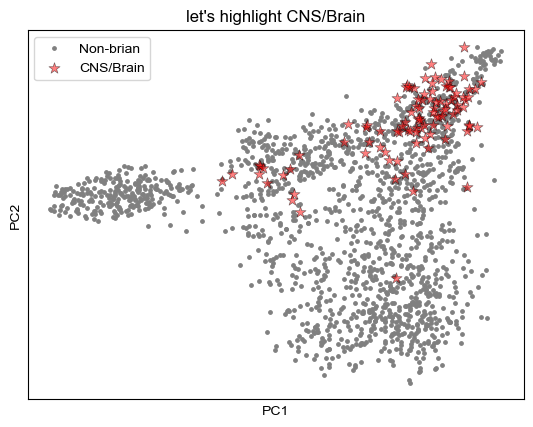

In [58]:
plt.scatter(nonbrain_pca_df["comp_0"],nonbrain_pca_df["comp_1"], 
            color="gray", label="Non-brian", s=6)
plt.scatter(brain_pca_df["comp_0"],brain_pca_df["comp_1"], color="red", 
            label="CNS/Brain", marker="*", alpha=0.5, edgecolors="k", linewidths=0.5, s=70)
# alpha=0.5 means 50% transp..
plt.title("let's highlight CNS/Brain")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.xticks([])
plt.yticks([])
# xticks can modify the bar sticks
plt.legend()

# Matplotlib subplots

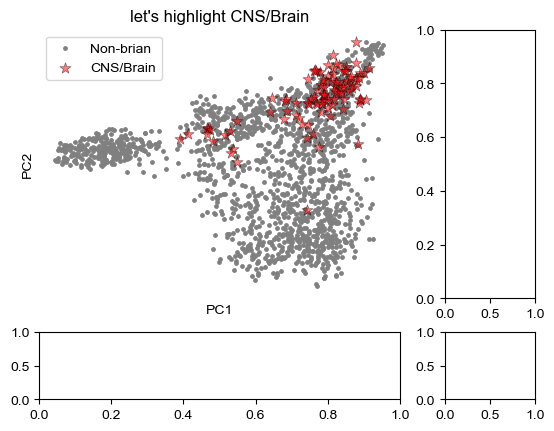

In [74]:
#fig, axs = plt.subplots(1, 1)
fig, axs = plt.subplots(2, 2, width_ratios=[0.8,0.2],
                                height_ratios=[0.8,0.2])
#fig.suptitle("")
# fig is the object contain figs
pca_ax = axs[0,0]
pca_ax.scatter(nonbrain_pca_df["comp_0"],nonbrain_pca_df["comp_1"], 
            color="gray", label="Non-brian", s=6)
pca_ax.scatter(brain_pca_df["comp_0"],brain_pca_df["comp_1"], color="red", 
            label="CNS/Brain", marker="*", alpha=0.5, edgecolors="k", linewidths=0.5, s=70)
# alpha=0.5 means 50% transp..
pca_ax.set_title("let's highlight CNS/Brain")
pca_ax.set_xlabel("PC1")
pca_ax.set_ylabel("PC2")
pca_ax.set_xticks([])
pca_ax.set_yticks([])
# xticks can modify the bar sticks
pca_ax.legend()
pca_ax.spines["top"].set_visible(False)
pca_ax.spines["right"].set_visible(False)
pca_ax.spines["left"].set_visible(False)
pca_ax.spines["bottom"].set_visible(False)
# remove the boader

# let go to the Seaborn

In [75]:
joint_df

,SPARC,KRT19,FN1,C19orf33,TGFBI,RPS4Y1,UCHL1,VIM,KRT7,KRT8,FXYD3,CD74,S100P,COL1A2,KRT18,S100A6,SLPI,IFI27,EPCAM,SERPINE1,LCN2,TACSTD2,SPINT2,HLA-DRA,IGFBP3,S100A14,MT1E,IGFBP7,CD24,AGR2,NNMT,ADIRF,CAV1,COL1A1,TM4SF1,SRGN,KRT17,MGST1,SPP1,EFEMP1,...,GPSM3,B4GALNT4,ETV4,HLA-C,RNF128,CLEC2B,FOXA1,SEMA3A,FXYD2,CHGA,CYTL1,FBN2,JAG1,RHOH,GPC4,PNMA2,GCHFR,KRT4,GPR176,A1BG,TPBG,SLAIN1,TFAP2C,MGST2,DAPK1,HOXB9,C6orf132,SERPINB6,TNFRSF19,NCF4,NXN,STAP2,PROS1,APOBEC3G,ACP5,GAS7,KLF4,CDKN1A,P4HA2,OncotreeLineage
ACH-000873,0.837729,8.975399,5.021780,6.294583,7.362137,7.352594,8.506367,4.016311,2.990821,8.599381,6.478370,7.431947,0.316280,0.049064,8.334628,9.601148,4.247882,1.201367,6.907849,1.032904,0.285799,7.372221,7.736465,7.315961,4.044626,6.736706,0.122360,5.188069,6.416540,3.091547,8.167014,4.678886,8.768647,4.320177,6.412453,0.085492,5.427959,7.749974,0.652826,9.589944,...,0.552536,5.015426,3.989087,7.929877,2.002595,1.719446,1.213393,0.831821,0.158086,0.010251,0.102362,3.726813,3.265689,0.003465,5.114749,3.204055,3.658313,0.375128,1.886790,3.495233,4.984388,2.123388,2.673490,5.671567,0.887625,2.873736,2.772513,5.425136,1.504682,-0.013462,4.942177,3.470370,2.132970,0.217277,0.313823,1.139417,3.445992,4.369613,5.837542,Esophagus/Stomach
ACH-000860,1.306335,9.315365,7.111923,8.057272,9.815371,8.139684,5.667177,7.073591,9.751536,9.769989,5.556999,0.746410,8.330727,-0.096940,9.455259,13.066679,1.200537,6.700607,8.802665,1.146311,0.448361,7.355294,8.599216,0.542066,5.535071,3.818940,8.874710,0.649584,6.885295,6.506620,0.312911,7.787051,8.448814,3.132175,8.368567,0.161234,0.409209,6.984908,5.684825,6.600207,...,3.476850,4.093327,4.424196,7.319271,0.096328,0.566527,3.711519,4.999425,0.132505,0.010251,0.027955,0.522205,5.854577,0.082844,3.120929,1.647813,5.116290,5.157533,0.990489,0.089344,5.097508,2.595011,3.245624,5.081140,4.367731,-0.015698,3.480609,6.176654,-0.005229,-0.013462,2.021363,4.308319,2.727327,0.269239,3.407135,0.143366,4.385773,3.604127,5.045666,Lung
ACH-000439,8.815292,-0.196002,0.954418,-0.171422,0.461725,8.697629,0.405518,8.750925,0.703107,2.660447,0.833862,10.146350,1.279446,0.090283,4.504529,4.380141,-0.167361,0.334865,-0.210781,0.572023,0.224045,0.029709,0.007308,9.182626,0.158105,-0.032092,0.297358,5.819696,0.119461,-0.020612,0.300642,0.368585,0.225800,-0.132209,4.104746,4.348491,0.088704,8.024768,1.212852,0.044784,...,5.978080,1.001285,0.234653,7.975609,-0.062001,2.927402,-0.128555,-0.050833,0.106471,0.036276,8.438723,0.104414,4.846742,4.618765,-0.013568,0.078330,0.056779,-0.016432,0.100507,4.174619,0.011666,-0.087928,-0.020898,6.805275,4.571002,-0.043824,-0.042096,7.181508,0.024012,6.342906,0.064426,2.880118,0.110890,4.045792,0.288666,1.717993,-0.177017,2.472430,0.453488,Myeloid
ACH-000318,3.271206,9.572499,7.845696,9.562125,8.630944,1.597513,4.370711,7.372734,6.376955,10.091135,9.137724,2.603905,6.597077,1.565444,9.833665,11.215327,7.531969,3.036090,7.764629,2.963196,5.230302,7.436194,8.976024,2.004489,3.773572,7.614518,8.843882,4.720700,8.088904,6.828066,3.461623,6.614314,8.439750,2.358489,6.841626,0.666847,11.230684,8.531627,2.364224,5.784325,...,2.057551,2.172546,4.793647,6.494636,0.272292,0.877794,4.540241,3.336424,-0.060220,1.054800,0.214343,3.220088,4.959278,0.252520,4.151281,0.227752,4.598598,5.962822,4.183274,0.018573,4.148157,1.965742,4.626931,5.409361,0.197713,0.623742,3.947112,3.606647,0.371188,0.093467,3.874254,4.711089,0.421650,2.215249,2.807343,0.860769,4.075018,5.493807,4.342597,Esophagus/Stomach
ACH-001142,11.253107,6.045606,13.988426,4.056279,10.275837,8.558051,9.252441,12.612595,7.129454,4.124124,-0.049593,3.353994,0.085860,10.659501,6.354077,13.182737,1.164829,10.553373,0.313073,12.259063,0.137636,-0.042793,1.858064,0.844127,5.444935,0.038358,8.063127,6.519194,2.123648,-0.131032,8.265335,1.255336,8.974794,11.023604,7.652042,6.492149,0.538050,7.652988,1.486240,7.537503,...,2.761685,3.248542,3.524038,9.719721,1.684952,5.019158,0.009012,3.441090,-0.060220,0.183054,3.752654,4.097134,3.435411,0.00346

In [90]:
[g for g in joint_df.columns if "CDK" in g]

['CDKN2A', 'CDKN1A']

Text(0.5, 1.0, 'DepMap: expression of CDKN2A')

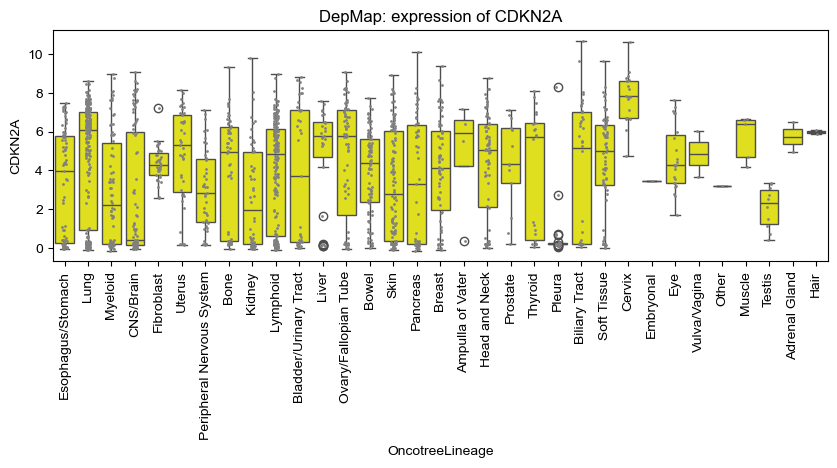

In [81]:
#make the plot cleaner
plt.figure(figsize=(10,3))# set the size

sns.boxplot(joint_df, x="OncotreeLineage",y="CDKN2A",
            color="yellow")
sns.stripplot(joint_df, x="OncotreeLineage",y="CDKN2A",
            color="gray", size=2.0)
# color="#DF2020"
plt.xticks(rotation="vertical")

plt.title("DepMap: expression of CDKN2A")

In [109]:
#make the plot cleaner
def gene_expression_boxplot(joint_df, gene, output_file):
    plt.figure(figsize=(10,5))# set the size

    sns.boxplot(joint_df, x="OncotreeLineage",y=gene,
            color="yellow")
    sns.stripplot(joint_df, x="OncotreeLineage",y=gene,
            color="gray", size=2.0)
    # color="#DF2020"
    plt.xticks(rotation="vertical")

    plt.title(f"DepMap: expression of {gene}")
    plt.tight_layout()
    plt.savefig(output_file)



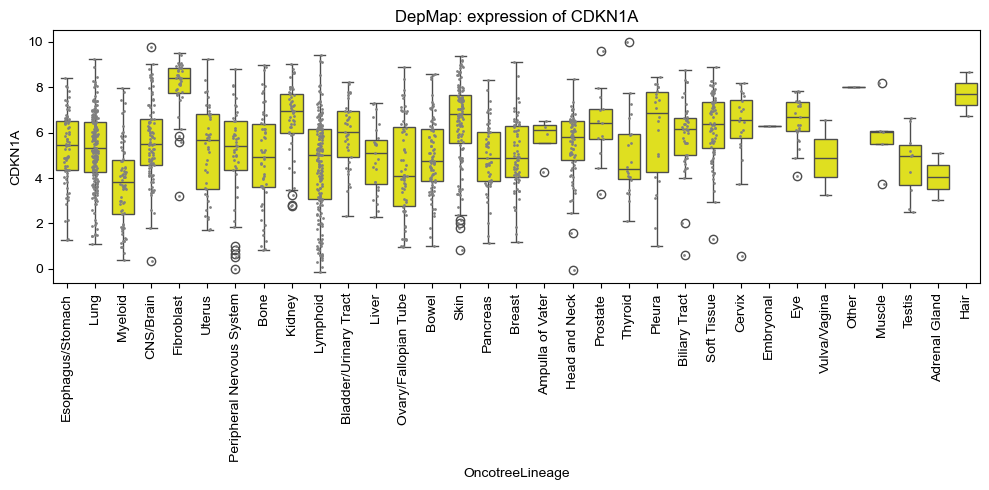

In [110]:
gene_expression_boxplot(joint_df, "CDKN1A", "CDKN1A_expression.pdf")

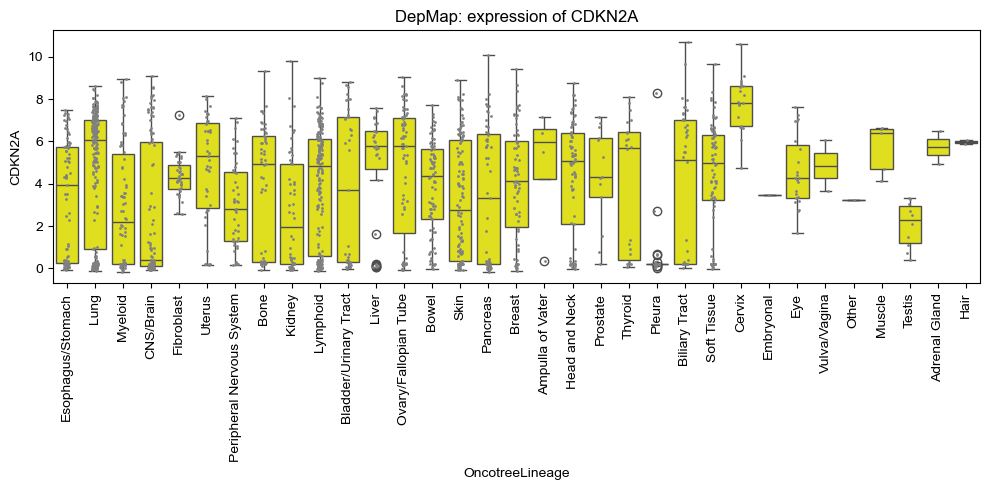

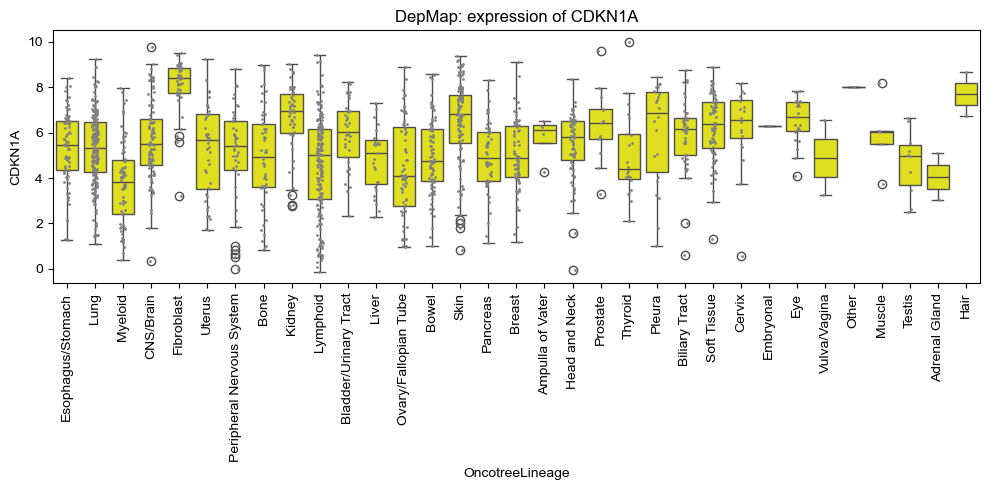

In [113]:
for gene in ["CDKN2A","CDKN1A"]:
    gene_expression_boxplot(joint_df, gene, f"{gene}_expression.pdf")

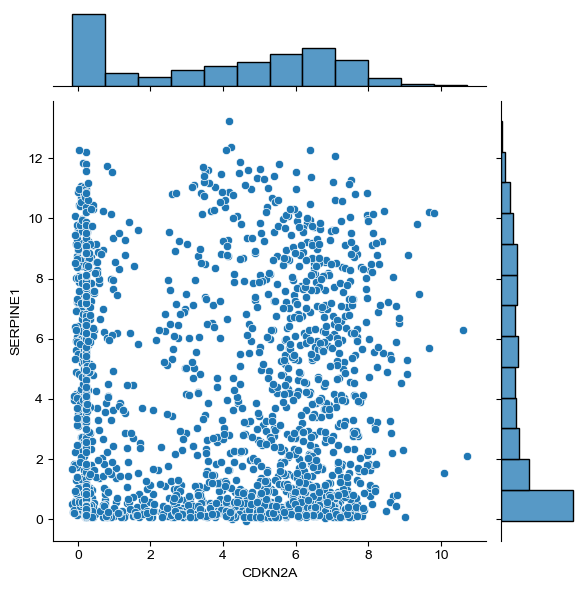

In [102]:
#seaborn function more
sns.jointplot(joint_df, x="CDKN2A", y="SERPINE1")

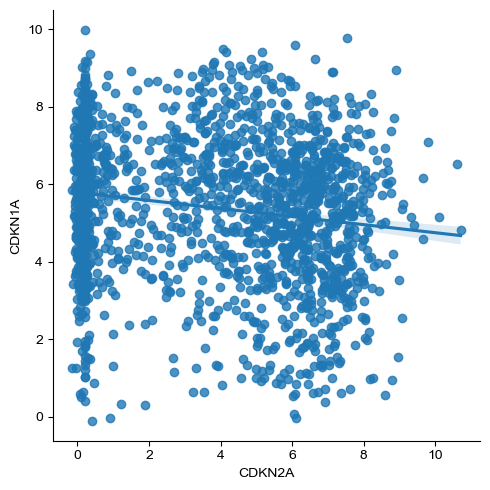

In [105]:
sns.lmplot(joint_df, x="CDKN2A", y="CDKN1A")
# get the linear 
# work for both matplotlib and seaborn
plt.savefig("lmplot.pdf")

# Plotly!

In [ ]:
import plotly_express as px
#plotly even can build a app!!

In [118]:
fig = px.scatter(pca_df, x="comp_0", y="comp_1", color="OncotreeLineage")
# much fancy!
fig.write_html("depmap_pca.html")